In [1]:
import numpy as np
from numpy.fft import fft, ifft, fftshift, fftfreq
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
def show_transform(x, y):
    """
    Plot y(x) and its transform.
    
    y can be real or complex.
    """
    x = np.asarray(x)
    y = np.asarray(y)
    fy = fftshift(fft(y))
    freqs = fftshift(fftfreq(len(x), d=(x[1] - x[0])))    
    fig, axs = plt.subplots(nrows=2, constrained_layout=True)

    for ax in axs:
        ax.margins(x=0.05, y=0.1)
        ax.grid(True)
        ax.locator_params(symmetric=True)
        # (Line above doesn't seem to be working as expected...)
            
    ax = axs[0]
    if y.dtype.kind == 'c':
        ax.plot(x, y.real, 'r+', x, y.imag, 'bx')
    else:
        ax.plot(x, y, 'k.')
    ax.set_xlabel("Time")
    
    ax = axs[1]
    ax.plot(freqs, np.abs(fy), 'ko', mfc='none', label='amp')
    ax.plot(freqs, fy.real, 'r+', label='real')
    ax.plot(freqs, fy.imag, 'bx', label='imag')

    ax.set_xlabel("Frequency, cycles per unit time")
    ax.legend(loc="best", 
                  numpoints=1,
                  fontsize='small')
    

    return fig, axs 

def gaussian_envelope (t):
    p_it = 1. - 1.* np.sin(2*np.pi*t)*np.exp(-np.power(t,2));
    return p_it

tsample = np.arange(0, 10., 0.0000025);
psample = gaussian_envelope(tsample);

fig, ax1 = plt.subplots()
ax1.set_xlabel("t/T")
ax1.set_ylabel("$p_\infty$/$p_{patm}$")
ax1.plot(tsample, psample, linewidth = 0.7, label = "applied pressure")

ax1.legend(loc = "lower right")

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()


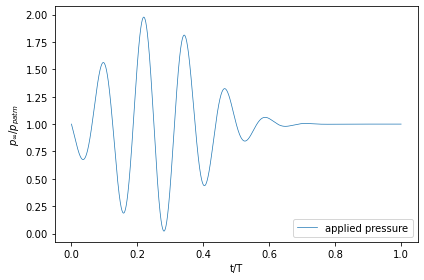

In [3]:
#define p_infty(t)
omega =  16*np.pi; #Equivalent N=8
Nwaves = 4;
Nwaves_sim = 2*Nwaves;
t0 = (2*np.pi/omega)*Nwaves/2;
def gaussian_envelope(t):
    return (1-np.sin(omega*t)*np.exp(-1.5*np.power(t/t0-1,2)));
tsample = np.arange(0, Nwaves_sim*2*np.pi/omega, 0.000001);
psample = gaussian_envelope(tsample);
fig, ax1 = plt.subplots()

ax1.set_xlabel("t/T")
ax1.set_ylabel("$p_\infty$/$p_{patm}$")
ax1.plot(tsample, psample, linewidth = 0.7, label = "applied pressure")

ax1.legend(loc = "lower right")

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()

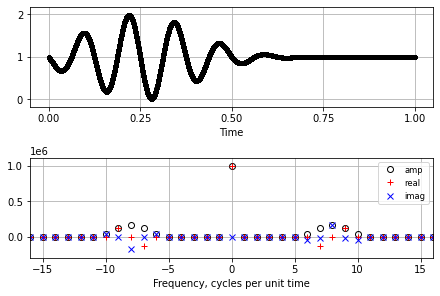

In [4]:
fig, axs = show_transform(tsample, psample);
plt.xlim(-2*omega/2/np.pi,2*omega/2/np.pi);
plt.show() #expect amplitude max at N=8

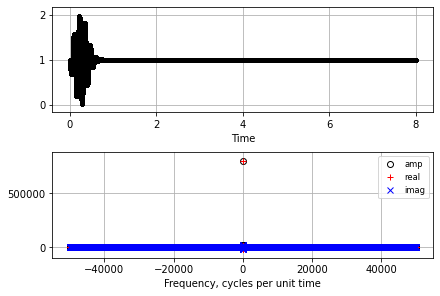

In [5]:
tsample2 = np.arange(0, 8, 0.00001);
psample2 = gaussian_envelope(tsample2);
fig, axs = show_transform(tsample2, psample2);
#plt.xlim(-5,5);
plt.show()

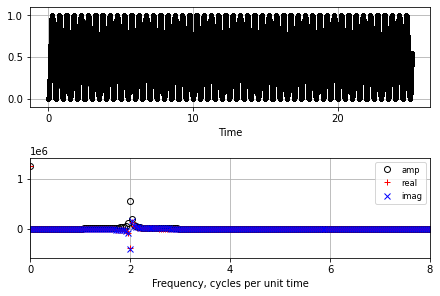

In [10]:
tsine = np.arange(0, 2*np.pi*4, 0.00001);
fsine = np.sin(2*np.pi*tsine);
show_transform(tsine, fsine**2)
plt.xlim(0,8);